In [1]:
import tensorflow as tf
 
 
 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [2]:
import librosa
import librosa.display

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
print(keras.__version__)

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

from keras.regularizers import l1
from keras.regularizers import l2

from keras.utils import to_categorical

from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import LeakyReLU

from keras.models import Sequential

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import itertools

2.3.1


Using TensorFlow backend.


In [3]:
# ref.: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
# Read data
melspectrogram = []
labels = []

for i in range(1,11):
    melspectrogram.append(np.load("UrbanSound8K/audio/fold/melspectrogram_fold"+str(i)+".npy"))
    labels.append(np.load("UrbanSound8K/audio/fold/labels_fold"+str(i)+".npy"))

Test, fold:  1
Train, fold:  [2, 3, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 62, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 63, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 62, 64)        18496     
______________________________________________________________

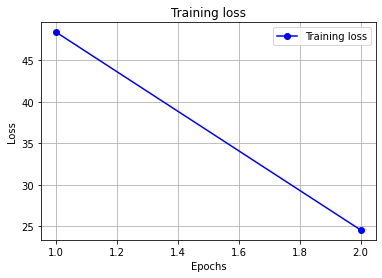

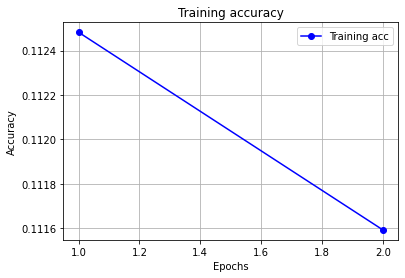


Test accurancy:
873/873 [==============================] - 1s 1ms/step
 11.454753577709198 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 11.45475372279496
Test, fold:  2
Train, fold:  [1, 3, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

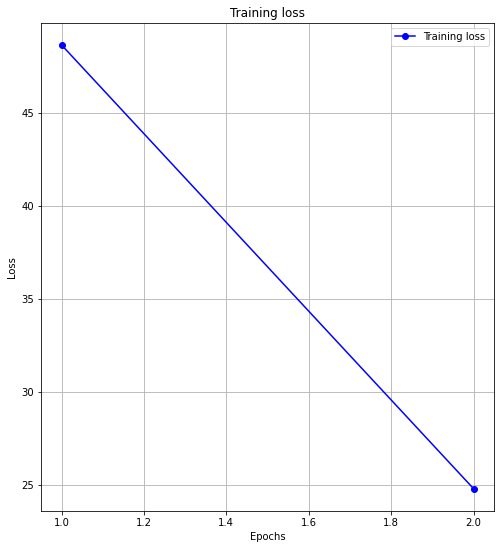

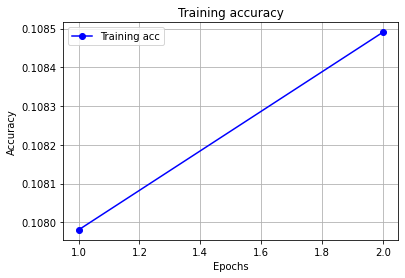


Test accurancy:
888/888 [==============================] - 1s 721us/step
 11.261261254549026 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 11.26126126126126
Test, fold:  3
Train, fold:  [1, 2, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

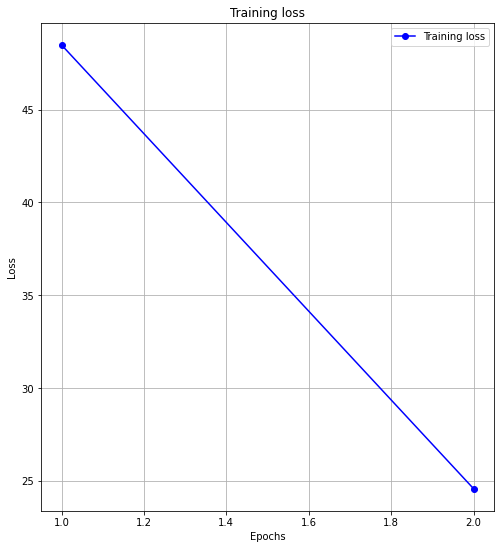

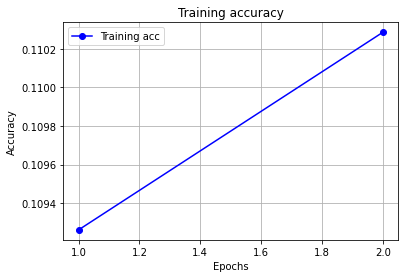


Test accurancy:
925/925 [==============================] - 1s 682us/step
 10.810811072587967 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 10.81081081081081
Test, fold:  4
Train, fold:  [1, 2, 3, 5, 6, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

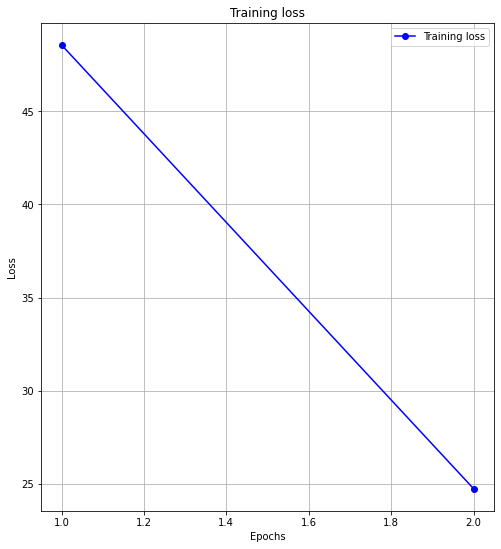

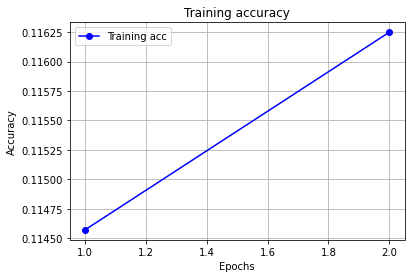


Test accurancy:
990/990 [==============================] - 1s 746us/step
 10.101009905338287 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 10.1010101010101
Test, fold:  5
Train, fold:  [1, 2, 3, 4, 6, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

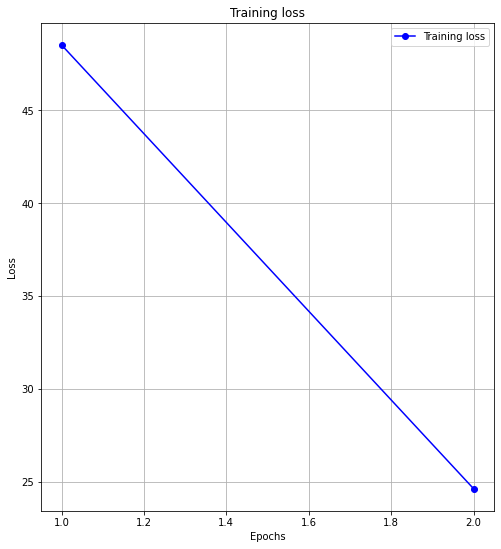

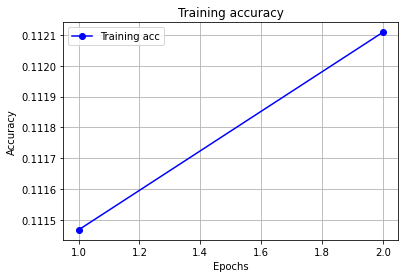


Test accurancy:
936/936 [==============================] - 1s 599us/step
 10.683760792016983 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 10.683760683760683
Test, fold:  6
Train, fold:  [1, 2, 3, 4, 5, 7, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
________________________________________________________________

<Figure size 432x288 with 0 Axes>

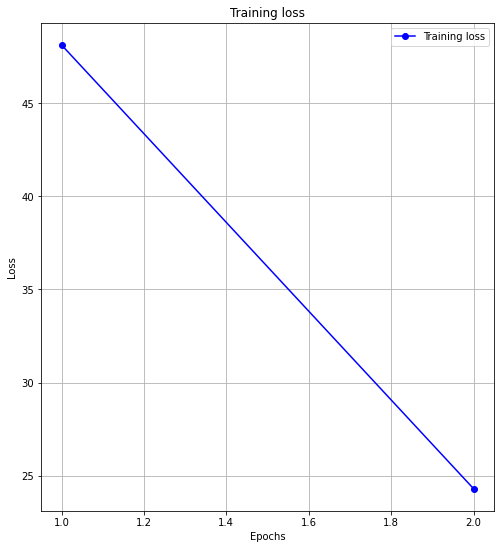

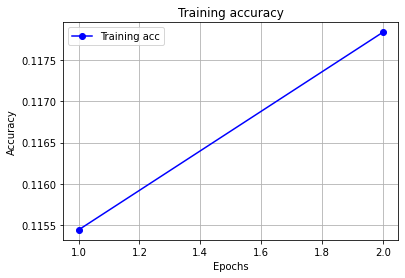


Test accurancy:
823/823 [==============================] - 1s 644us/step
 8.262454718351364 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Test accuracy = 8.262454434993925
Test, fold:  7
Train, fold:  [1, 2, 3, 4, 5, 6, 8, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

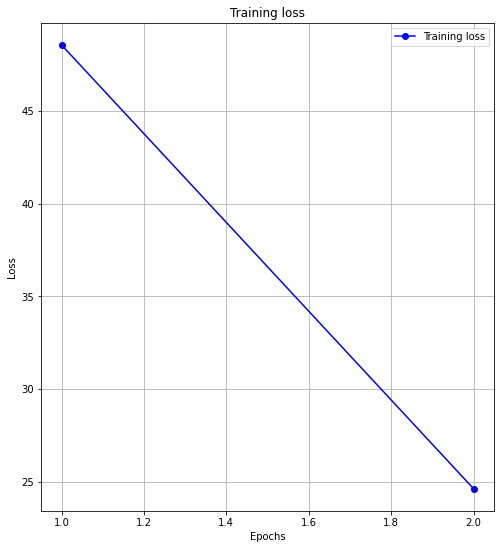

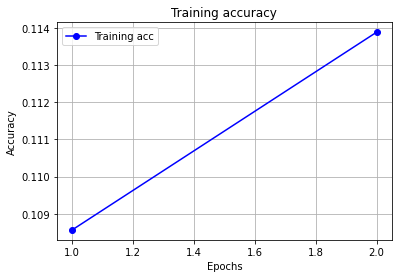


Test accurancy:
838/838 [==============================] - 0s 555us/step
 9.069212526082993 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Test accuracy = 9.069212410501192
Test, fold:  8
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 9, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

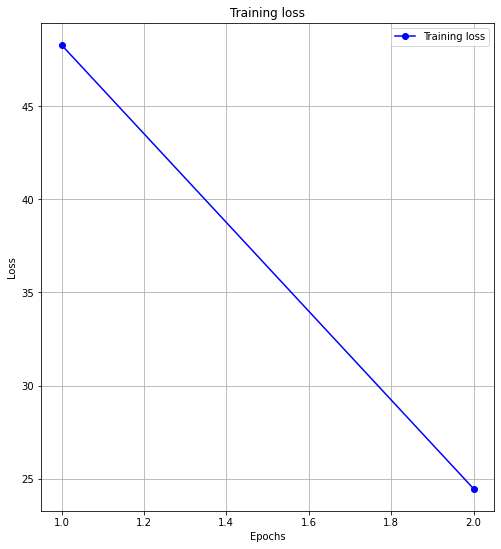

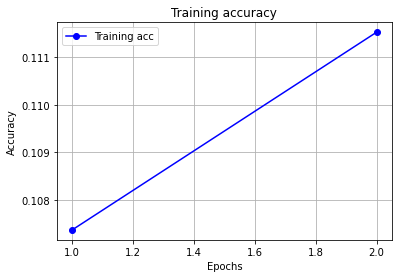


Test accurancy:
806/806 [==============================] - 0s 343us/step
 12.406948208808899 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Test accuracy = 12.40694789081886
Test, fold:  9
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 8, 10]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
_________________________________________________________________

<Figure size 432x288 with 0 Axes>

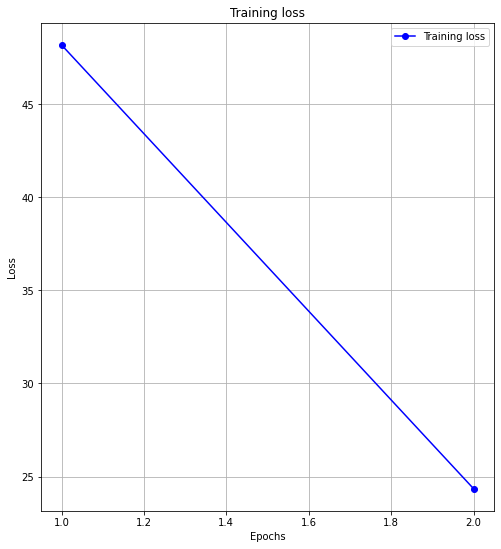

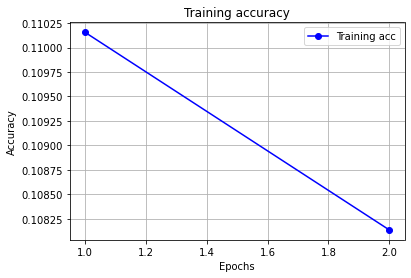


Test accurancy:
816/816 [==============================] - 0s 573us/step
 10.90686246752739 %



C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Test accuracy = 10.906862745098039
Test, fold:  10
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 62, 32)        0         
________________________________________________________________

<Figure size 432x288 with 0 Axes>

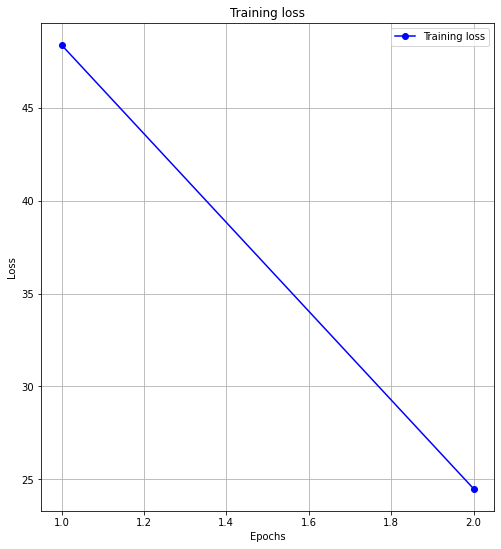

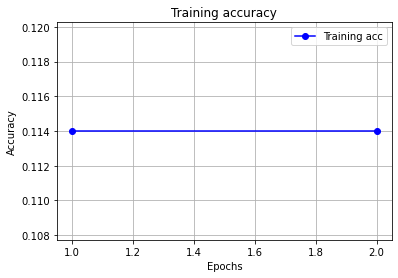


Test accurancy:
837/837 [==============================] - 0s 577us/step
 11.947431415319443 %

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Test accuracy = 11.947431302270012


C:\Users\min\anaconda3\envs\rtx\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<Figure size 432x288 with 0 Axes>

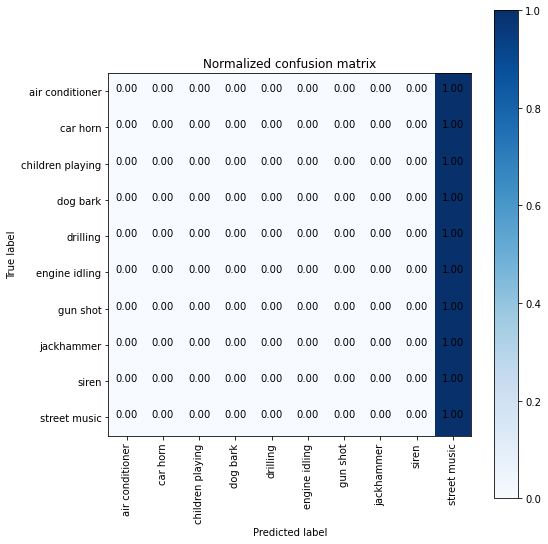

In [6]:
accurancy_fold = []

for fold_nmb in range(10):
    
    lr = 0.0001
    batch_size = 125
    epochs = 2

    fold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    print('Test, fold: ', fold_nmb+1)
    fold.remove(fold_nmb+1)
    print('Train, fold: ', fold)
    
    melspectrogram_train = (melspectrogram[fold[0]-1], melspectrogram[fold[1]-1],
                            melspectrogram[fold[2]-1], melspectrogram[fold[3]-1], 
                            melspectrogram[fold[4]-1], melspectrogram[fold[5]-1], 
                            melspectrogram[fold[6]-1], melspectrogram[fold[7]-1],
                            melspectrogram[fold[8]-1])
    labels_train = (labels[fold[0]-1], labels[fold[1]-1], labels[fold[2]-1],
                    labels[fold[3]-1], labels[fold[4]-1], labels[fold[5]-1],
                    labels[fold[6]-1], labels[fold[7]-1], labels[fold[8]-1])

    melspectrogram_test = melspectrogram[fold_nmb]
    labels_test = labels[fold_nmb]
                        
    melspectrogram_train = np.concatenate(melspectrogram_train, axis=0)
    labels_train = np.concatenate(labels_train, axis=0)
    
    # ------------------------------------------------------------------------------------------------------
    
    mean = np.mean(melspectrogram_train, axis = 0)
    std = np.std(melspectrogram_train, axis = 0)

    X_train_stand_score = (melspectrogram_train-mean)/std
    X_test_stand_score = (melspectrogram[fold_nmb]-mean)/std
    
    # ------------------------------------------------------------------------------------------------------
    
    X_train = X_train_stand_score.reshape((X_train_stand_score.shape[0], X_train_stand_score.shape[1], X_train_stand_score.shape[2], 1))
    X_test = X_test_stand_score.reshape((X_test_stand_score.shape[0], X_test_stand_score.shape[1], X_test_stand_score.shape[2], 1))

    y_train = to_categorical(labels_train)
    y_test = to_categorical(labels_test)
    
    # ------------------------------------------------------------------------------------------------------
    # CNN24
    num_rows = X_train_stand_score.shape[1]
    num_columns = X_train_stand_score.shape[2]
    num_channels = 1
    num_labels = 10

    keras.backend.clear_session()
    
    model = models.Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape = (num_rows,num_columns,num_channels))) 
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))       

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  

    model.add(Flatten())
          
    model.add(Dense(256,  kernel_regularizer=l2(0.1)))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(256, kernel_regularizer=l2(0.1)))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(10,activation ='softmax'))
    
    model.summary()
    
    opt = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size)
    
    history_dict = history.history
 
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(1, len(acc) + 1)

    
    plt.clf()   # clear figure
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.clf()   # clear figure
    acc_values = history_dict['accuracy']

    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
    
    print('')
    print('Test accurancy:')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('', 100*test_acc, '%')
    
    print('')
    y_pred = model.predict(X_test)

    classID = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    classes = ['air conditioner', 'car horn', 'children playing', 'dog bark', 
           'drilling','engine idling', 'gun shot', 'jackhammer', 'siren', 'street music']

    matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classID)
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    np.set_printoptions(precision=2)

    plt.clf()   # clear figure
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(matrix, classes=classes, normalize=True, title='Normalized confusion matrix')
    print("Test accuracy = " + str(100*accuracy))
    
    accurancy_fold.append(accuracy)

In [7]:
print(accurancy_fold)
print('Average test accurancy: ', 100*np.mean(accurancy_fold), '+/-', 100*np.std(accurancy_fold),'%')

[0.1145475372279496, 0.11261261261261261, 0.10810810810810811, 0.10101010101010101, 0.10683760683760683, 0.08262454434993925, 0.09069212410501193, 0.12406947890818859, 0.1090686274509804, 0.11947431302270012]
Average test accurancy:  10.690450536331983 +/- 1.1986964506448654 %
